# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [57]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [58]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Trainning Set image shape: (50000, 32, 32, 3)
Training set label shape: (50000, 1)
Testing Set image shape: (10000, 32, 32, 3)
Testing set label shape: (10000, 1)
Size of each image: 32x32, number of channels : 3
Total number of categories : 100


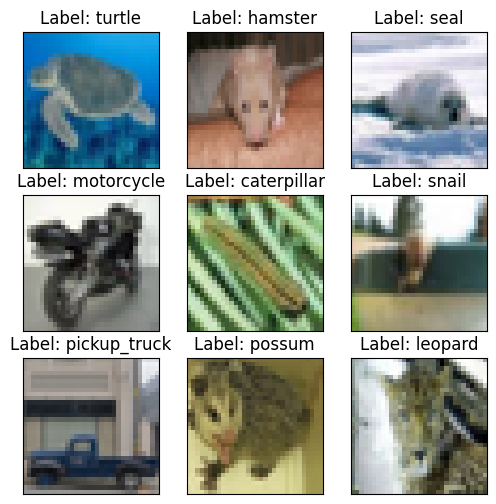

In [59]:
# Your Code Here
import matplotlib.pyplot as plt
import numpy as np

print("Trainning Set image shape:", x_train.shape)
print("Training set label shape:", y_train.shape)
print("Testing Set image shape:", x_test.shape)
print("Testing set label shape:", y_test.shape)
print("Size of each image: 32x32, number of channels :", x_train.shape[3])
print("Total number of categories :",len(np.unique(y_train)))


random_indices = np.random.choice(len(x_train.imag), 9, replace=False)
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {class_names[y_train[random_indices[i]][0]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()


### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [60]:
# Your Code Here
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=len(class_names))
y_test  = to_categorical(y_test, num_classes=len(class_names))

x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Training set images:", x_train_sub.shape)
print("Validation set images:", x_val.shape)
print("Test set images:", x_test.shape)

print("Training set labels:", y_train_sub.shape)
print("Validation set labels:", y_val.shape)
print("Test set labels:", y_test.shape)

Training set images: (40000, 32, 32, 3)
Validation set images: (10000, 32, 32, 3)
Test set images: (10000, 32, 32, 3)
Training set labels: (40000, 100)
Validation set labels: (10000, 100)
Test set labels: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [85]:
# Your Code Here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,420 (1.41 MB)

 Trainable params: 368,420 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [86]:
# Your Code Here
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [87]:
# Your Code Here
history= model.fit(
          x_train_sub, y_train_sub,
          epochs=20,
          batch_size=32,
          verbose=2
)

Epoch 1/20
1250/1250 - 6s - 5ms/step - accuracy: 0.0913 - loss: 3.9669
Epoch 2/20
1250/1250 - 4s - 3ms/step - accuracy: 0.2173 - loss: 3.2322
Epoch 3/20
1250/1250 - 4s - 3ms/step - accuracy: 0.2894 - loss: 2.8419
Epoch 4/20
1250/1250 - 4s - 3ms/step - accuracy: 0.3441 - loss: 2.5735
Epoch 5/20
1250/1250 - 4s - 3ms/step - accuracy: 0.3839 - loss: 2.3667
Epoch 6/20
1250/1250 - 4s - 3ms/step - accuracy: 0.4228 - loss: 2.1981
Epoch 7/20
1250/1250 - 5s - 4ms/step - accuracy: 0.4554 - loss: 2.0443
Epoch 8/20
1250/1250 - 4s - 3ms/step - accuracy: 0.4821 - loss: 1.9058
Epoch 9/20
1250/1250 - 5s - 4ms/step - accuracy: 0.5125 - loss: 1.7840
Epoch 10/20
1250/1250 - 4s - 3ms/step - accuracy: 0.5399 - loss: 1.6698
Epoch 11/20
1250/1250 - 4s - 3ms/step - accuracy: 0.5644 - loss: 1.5590
Epoch 12/20
1250/1250 - 4s - 3ms/step - accuracy: 0.5900 - loss: 1.4588
Epoch 13/20
1250/1250 - 6s - 5ms/step - accuracy: 0.6119 - loss: 1.3554
Epoch 14/20
1250/1250 - 4s - 3ms/step - accuracy: 0.6332 - loss: 1.2697
E

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [88]:
# Your Code Here

loss, accuracy = model.evaluate(x_val, y_val)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3450 - loss: 3.9318
Loss:     3.94
Accuracy: 34.30%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

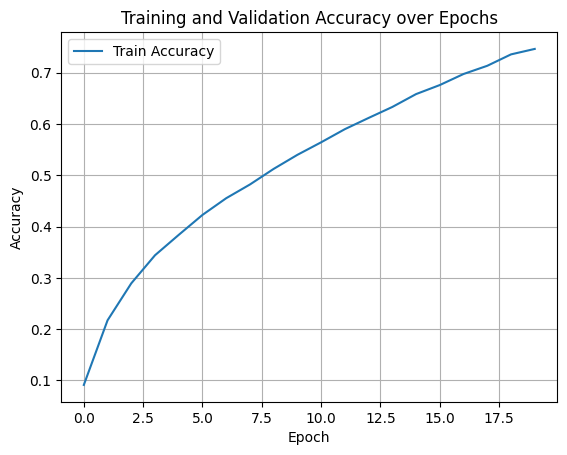

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


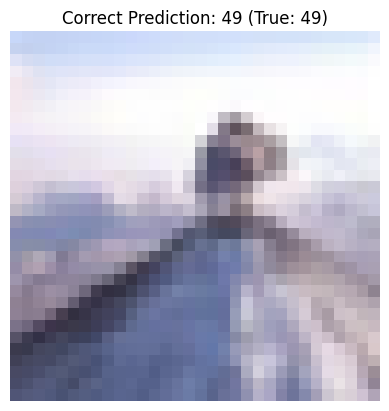

Top-5 Prediction Probabilities (Correct Case):
Class 49: 37.85%
Class 30: 16.98%
Class 32: 9.03%
Class 76: 7.58%
Class 72: 5.24%


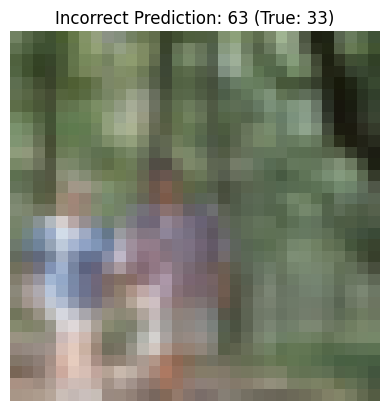

Top-5 Prediction Probabilities (Incorrect Case):
Class 63: 56.46%
Class 56: 16.92%
Class 88: 8.12%
Class 96: 5.49%
Class 42: 4.60%


In [93]:
# Your Code Here
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np

y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]


correct_idx = correct_indices[0]
img_correct = x_test[correct_idx]
true_correct = y_true_classes[correct_idx]
pred_correct = y_pred_classes[correct_idx]
probs_correct = y_pred_probs[correct_idx]

incorrect_idx = incorrect_indices[0]
img_wrong = x_test[incorrect_idx]
true_wrong = y_true_classes[incorrect_idx]
pred_wrong = y_pred_classes[incorrect_idx]
probs_wrong = y_pred_probs[incorrect_idx]

plt.imshow(img_correct)
plt.title(f"Correct Prediction: {pred_correct} (True: {true_correct})")
plt.axis('off')
plt.show()

print("Top-5 Prediction Probabilities (Correct Case):")
for i in probs_correct.argsort()[-5:][::-1]:
    print(f"Class {i}: {probs_correct[i]*100:.2f}%")


plt.imshow(img_wrong)
plt.title(f"Incorrect Prediction: {pred_wrong} (True: {true_wrong})")
plt.axis('off')
plt.show()

print("Top-5 Prediction Probabilities (Incorrect Case):")
for i in probs_wrong.argsort()[-5:][::-1]:
    print(f"Class {i}: {probs_wrong[i]*100:.2f}%")

Discussion

The model correctly classified one image with moderate confidence (37.85%), showing it learned useful features. However, in the incorrect case, it predicted the wrong class with high confidence (56.46%), likely due to visual similarity between classes. This suggests the model performs reasonably well but still struggles with fine-grained distinctions in CIFAR-100.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [76]:
# Your Code Here
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_sub)

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout
model.add(Dense(100, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [77]:
# Your Code Here
history = model.fit(
    datagen.flow(x_train_sub, y_train_sub, batch_size=64),
    validation_data=(x_val, y_val),
    epochs=50,
    steps_per_epoch=len(x_train_sub) // 64,
    verbose=2
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 - 30s - 47ms/step - accuracy: 0.0528 - loss: 4.3442 - val_accuracy: 0.0993 - val_loss: 3.8905
Epoch 2/50
625/625 - 35s - 56ms/step - accuracy: 0.0943 - loss: 3.9363 - val_accuracy: 0.1324 - val_loss: 3.6982
Epoch 3/50
625/625 - 22s - 34ms/step - accuracy: 0.1260 - loss: 3.7071 - val_accuracy: 0.1863 - val_loss: 3.3254
Epoch 4/50
625/625 - 42s - 67ms/step - accuracy: 0.1526 - loss: 3.5494 - val_accuracy: 0.2295 - val_loss: 3.1334
Epoch 5/50
625/625 - 40s - 63ms/step - accuracy: 0.1763 - loss: 3.4130 - val_accuracy: 0.2020 - val_loss: 3.2654
Epoch 6/50
625/625 - 42s - 66ms/step - accuracy: 0.1934 - loss: 3.2905 - val_accuracy: 0.2805 - val_loss: 2.8660
Epoch 7/50
625/625 - 22s - 35ms/step - accuracy: 0.2193 - loss: 3.1763 - val_accuracy: 0.2870 - val_loss: 2.8314
Epoch 8/50
625/625 - 41s - 66ms/step - accuracy: 0.2361 - loss: 3.0706 - val_accuracy: 0.2809 - val_loss: 2.8826
Epoch 9/50
625/625 - 22s - 35ms/step - accuracy: 0.2502 - loss: 2.9837 - val_accuracy: 0.3426 - val_loss: 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5297 - loss: 1.8067
Enhanced model test loss: 1.8010
Enhanced model test accuracy: 51.88%


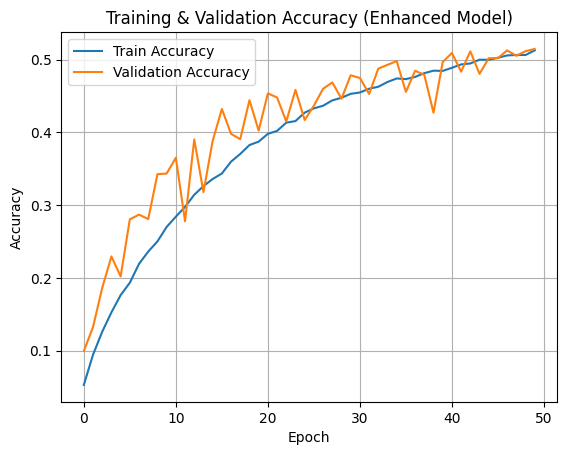

In [79]:
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Enhanced model test loss: {loss:.4f}")
print(f"Enhanced model test accuracy: {accuracy * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy (Enhanced Model)')
plt.legend()
plt.grid(True)
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The original model achieved a test accuracy of around 34.47%, while the enhanced model reached 51.88%, showing a substantial improvement of nearly 18 percentage points. This confirms that the performance of the model significantly improved after applying enhancement techniques.

The improvement is mainly due to three strategies: Dropout, which reduces overfitting by randomly turning off neurons. Batch Normalization, which stabilizes and accelerates training by normalizing activations; and Data Augmentation, which increases training data diversity by applying random transformations to images. These changes helped the model generalize better and learn more robust features.

Although the enhanced model performs much better, it still falls slightly short of the 55% target. There is room for improvement by adding more convolutional layers, experimenting with different learning rates, or using advanced architectures like ResNet or transfer learning.

Overall, the enhancement techniques clearly had a strong positive impact on performance, and further tuning or architectural changes could help reach or exceed the target accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.